In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
iris_dataset = load_iris()

In [3]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris_df = pd.DataFrame(iris_dataset.data)
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris_df['class']=iris_dataset.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines

In [9]:
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


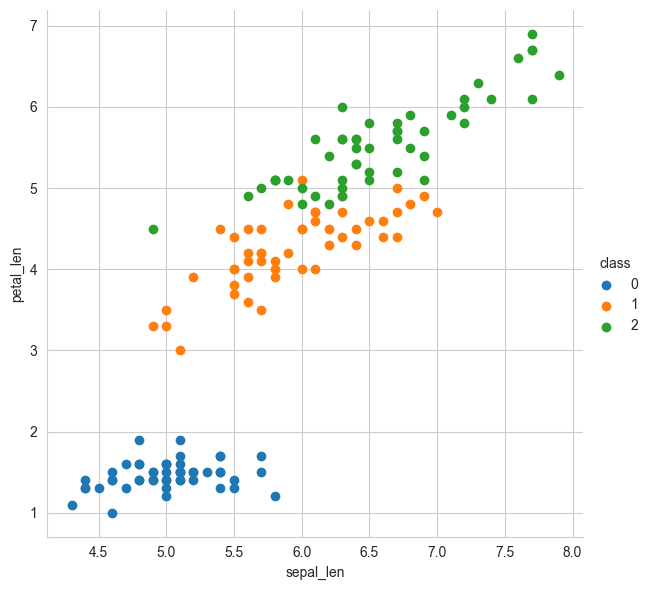

In [13]:
# style used as a theme of graph
# for example if we want black
# graph with grid then write "darkgrid"
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(iris_df, hue ="class",
              height = 6).map(plt.scatter,
                              'sepal_len',
                              'petal_len').add_legend()

In [19]:
X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape

(105, 4)

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(4,), activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/4 [======>.......................] - ETA: 0s - loss: 1.2233 - accuracy: 0.3125

2023-03-29 00:07:16.658619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 66ms/step - loss: 1.1907 - accuracy: 0.3429
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0842 - accuracy: 0.3524
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0052 - accuracy: 0.3524
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9504 - accuracy: 0.3524
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9156 - accuracy: 0.5238
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8764 - accuracy: 0.6476
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8346 - accuracy: 0.6476
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8004 - accuracy: 0.6476
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7756 - accuracy: 0.7524
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7542 - accuracy: 0.6857
Epoch 11/100
4/4 [======================

In [27]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels

2/2 [==============================] - 0s 4ms/step


[1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0]

In [28]:
y_predicted_labels[10]

2

In [29]:
y_test[10]

2

In [30]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Predicted')

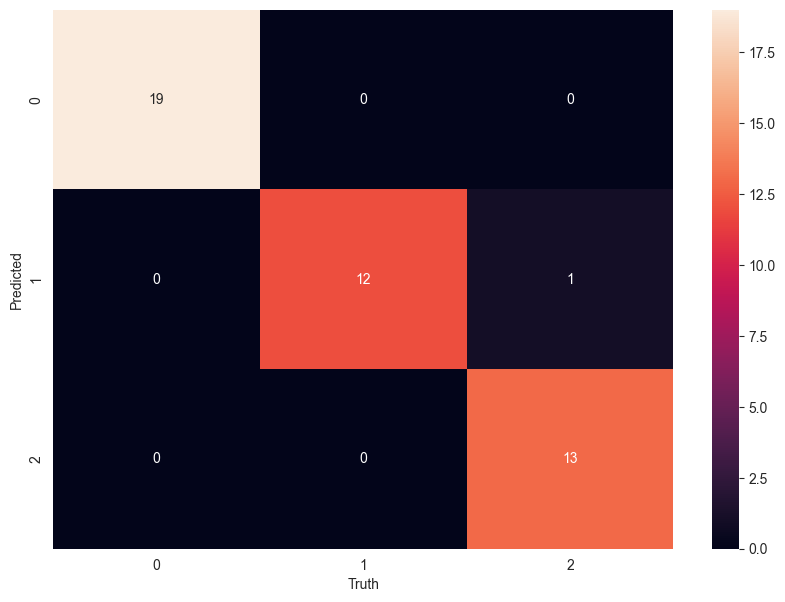

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [32]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 21ms/step - loss: 0.1702 - accuracy: 0.9778


2023-03-29 00:11:02.837943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.1702374666929245, 0.9777777791023254]